<a href="https://colab.research.google.com/github/deepanshu-j/mnist_number_prediction/blob/main/mnist_number_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
tf.__version__

'2.6.0'

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
import matplotlib.pyplot as plt
# plt.imshow()
print(x_train.shape)
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test= tf.keras.utils.normalize( x_test ,axis=1)

(60000, 28, 28)


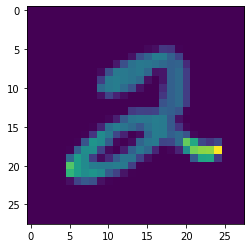

In [7]:
plt.imshow(x_train[5])


In [8]:
import random 
a = random.randint(1,10)
print(a) 
# mat = [x for x in range(25)] 

7


(25, 25)


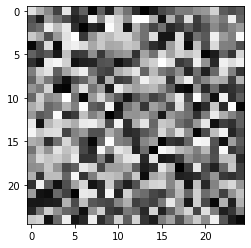

In [9]:
# NO USE CODE
mat = np.array([ [random.randint(1,256) for _ in range(0,25)] for __ in range(0,25)])
print(mat.shape)
plt.imshow(mat)
plt.imshow(mat , cmap= plt.cm.binary)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2923 - accuracy: 0.9156
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1201 - accuracy: 0.9635
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0813 - accuracy: 0.9742


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9693
0.09985771775245667 0.9692999720573425


In [12]:
model.save("number_prediction.model")


INFO:tensorflow:Assets written to: number_prediction.model/assets


In [13]:
new_model= tf.keras.models.load_model("number_prediction.model")

In [14]:
predictions = new_model.predict([x_test]) 

In [17]:
print(np.argmax(predictions[1]))

2


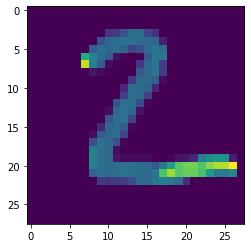

In [18]:
plt.imshow(x_test[1])
plt.show()